### imports

In [77]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
try:
    import matplotlib.pyplot as plt
except ImportError:
    pass

from ml1_mnist.base import BaseEstimator
from ml1_mnist.knn import KNNClassifier
from ml1_mnist.metrics import (zero_one_loss, 
                               confusion_matrix, 
                               plot_confusion_matrix)
from ml1_mnist.utils.dataset import (load_mnist, 
                                     plot_mnist_digit)
from ml1_mnist.utils.model_selection import TrainTestSplitter
from ml1_mnist.utils.read_write import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load dataset

In [3]:
X, y = load_mnist(mode='train', path='data/')
X.shape

(60000, 784)

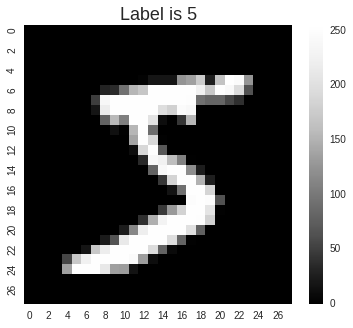

In [79]:
plot_mnist_digit(X[0], y[0]);

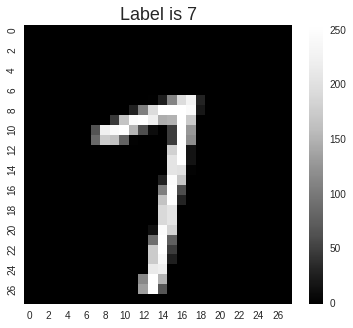

In [80]:
plot_mnist_digit(X[42], y[42]);

# k-NN

In [6]:
tts = TrainTestSplitter(shuffle=True, random_seed=1337)
for train, test in tts.k_fold_split(y, n_folds=4, stratify=True):
    print len(train), len(test), len(train) + len(test)

45005 14995 60000
45005 14995 60000
45005 14995 60000
44985 15015 60000


In [7]:
model = load_model('ml1_mnist/knn/model.json')
print model.get_params(deep=False)

IOError: [Errno 2] No such file or directory: 'ml1_mnist/knn/model.json'

In [ ]:
model.save('knn.json', indent=4)

In [54]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
C = confusion_matrix(y_true, y_pred)
C.dtype is np.dtype('float')

False

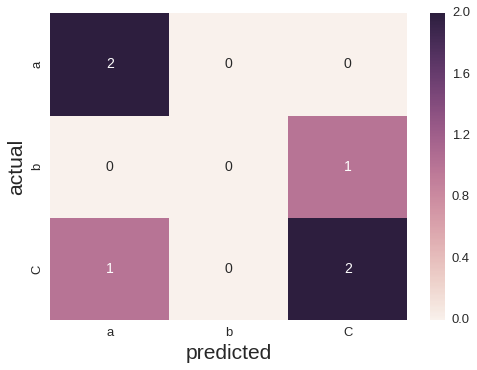

In [100]:
ax = plot_confusion_matrix(C, labels=["a", "b", "C"])